In [1]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [6]:
data[['day', 'month', 'year']] = data['week'].str.split('/', expand=True)
data.drop(columns=['week'], inplace=True)
data.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

y = data['units_sold']
X = data.drop(columns=['units_sold'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [11]:
model.score(X_test, y_test)

0.7757387343222173

In [17]:
from sklearn.metrics import root_mean_squared_error

In [18]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

27.12617750115515

In [19]:
data['units_sold'].describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

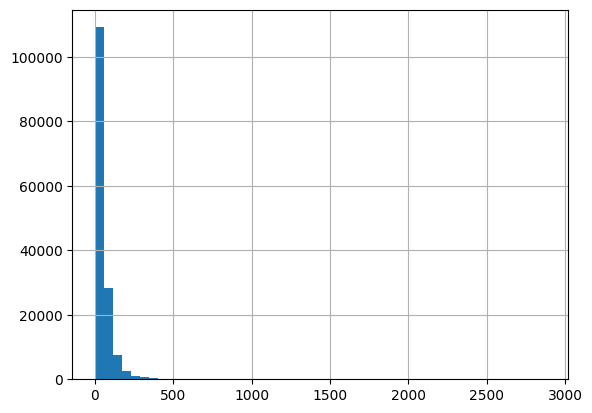

In [22]:
data.units_sold.hist(bins=50)

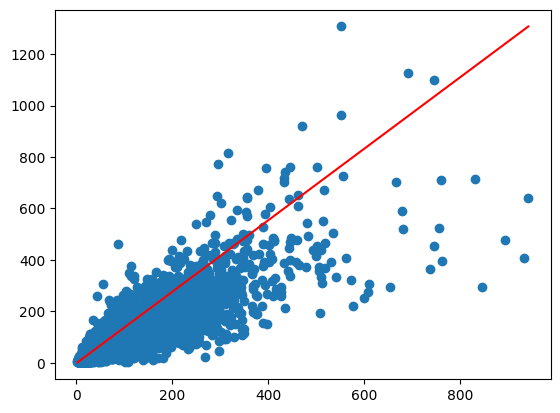

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max(), 100), np.linspace(y_test.min(), y_test.max(), 100), color='red')

array([[<Axes: title={'center': 'record_ID'}>,
        <Axes: title={'center': 'store_id'}>,
        <Axes: title={'center': 'sku_id'}>],
       [<Axes: title={'center': 'total_price'}>,
        <Axes: title={'center': 'base_price'}>,
        <Axes: title={'center': 'is_featured_sku'}>],
       [<Axes: title={'center': 'is_display_sku'}>,
        <Axes: title={'center': 'units_sold'}>, <Axes: >]], dtype=object)

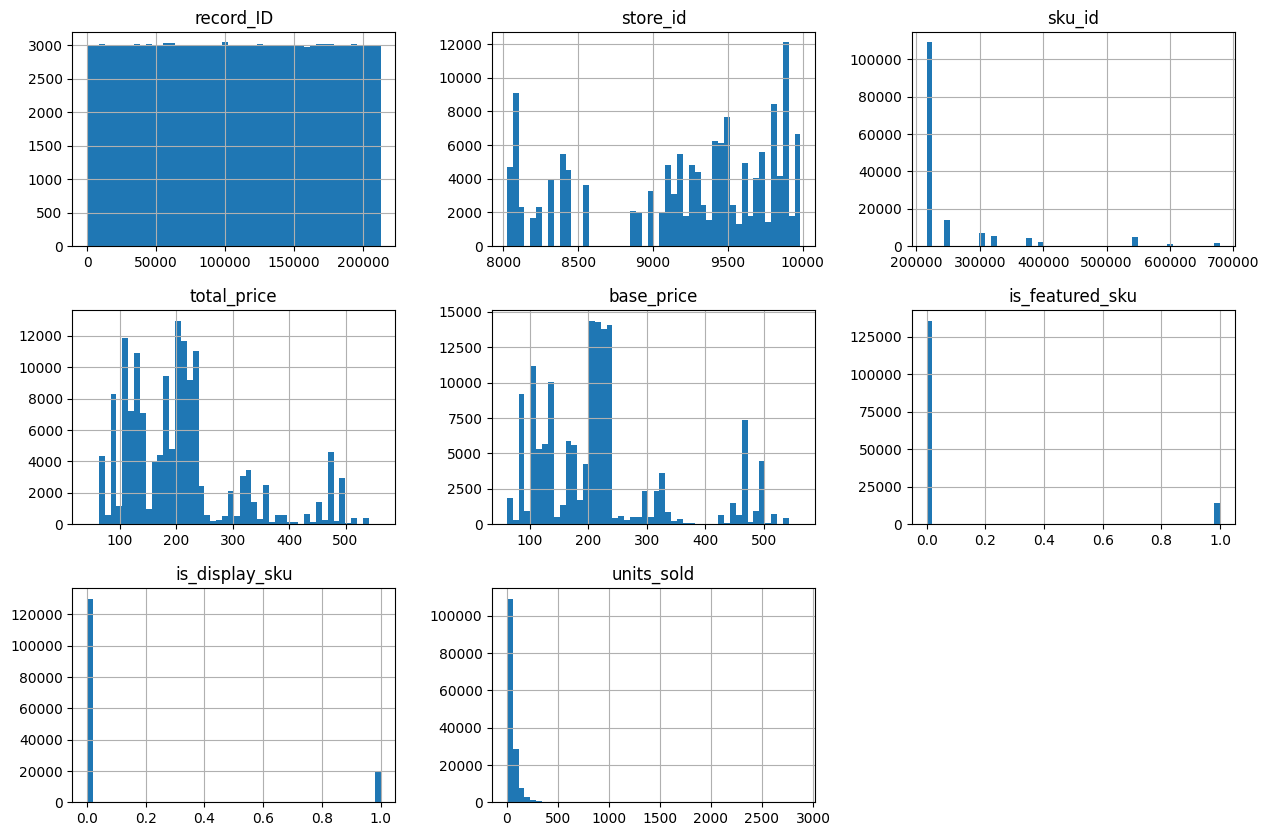

In [27]:
data.hist(figsize=(15, 10), bins=50)

In [63]:
data = pd.read_csv('train.csv')
data[['day', 'month', 'year']] = data['week'].str.split('/', expand=True)
data.drop(columns=['week'], inplace=True)
data.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11


In [64]:
data.drop('record_ID', axis=1, inplace=True)
data.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11


In [65]:
data.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

In [66]:
data = data[data.units_sold < data.units_sold.quantile(0.99)]
data.units_sold.describe()

count    148636.000000
mean         47.842616
std          42.898247
min           1.000000
25%          19.000000
50%          35.000000
75%          61.000000
max         282.000000
Name: units_sold, dtype: float64

array([[<Axes: title={'center': 'store_id'}>,
        <Axes: title={'center': 'sku_id'}>,
        <Axes: title={'center': 'total_price'}>],
       [<Axes: title={'center': 'base_price'}>,
        <Axes: title={'center': 'is_featured_sku'}>,
        <Axes: title={'center': 'is_display_sku'}>],
       [<Axes: title={'center': 'units_sold'}>, <Axes: >, <Axes: >]],
      dtype=object)

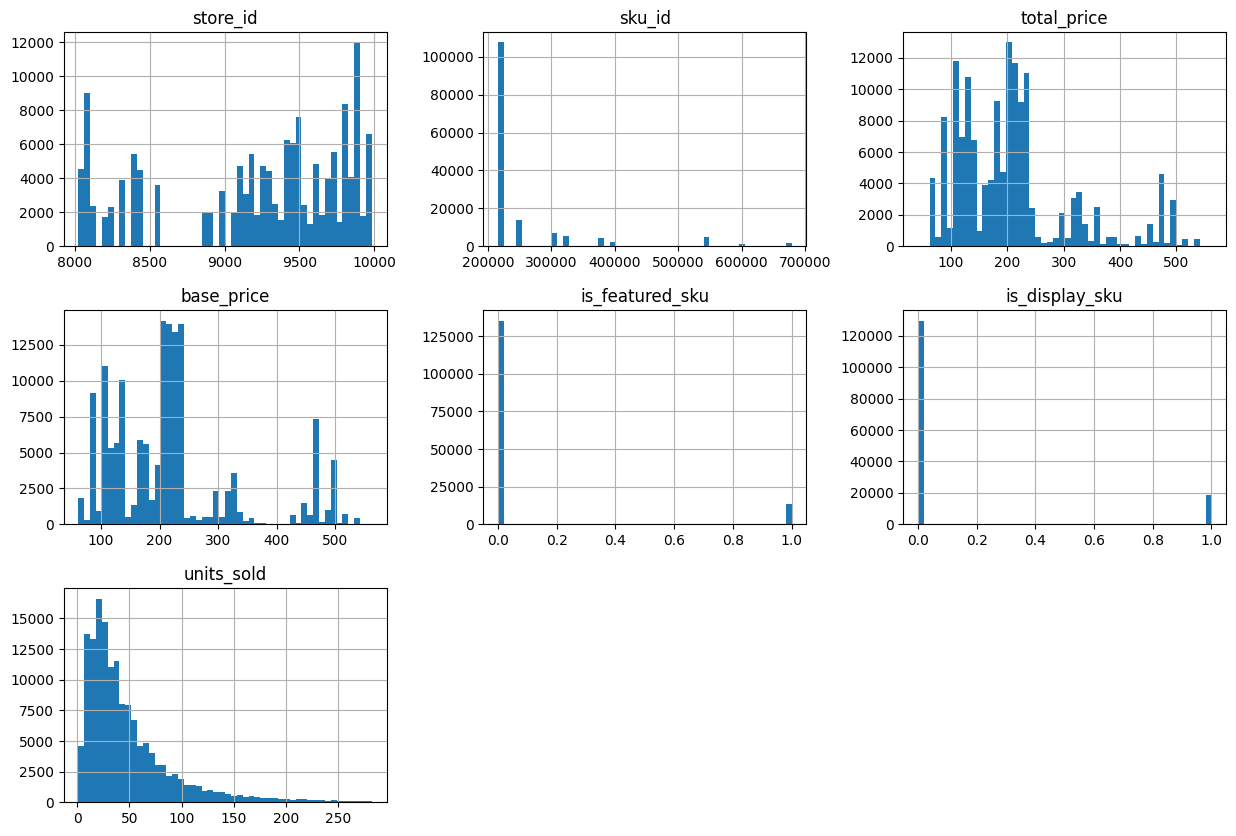

In [67]:
data.hist(figsize=(15, 10), bins=50)

In [68]:
data = data.join(pd.get_dummies(data.store_id, prefix='store')).drop(columns=['store_id'])

In [69]:
data = data.join(pd.get_dummies(data.sku_id, prefix='item')).drop(columns=['sku_id'])

In [70]:
data.head()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
y = data['units_sold']
X = data.drop(columns=['units_sold'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
model.score(X_test, y_test)

0.8253547433312853

In [73]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

17.838855962304994

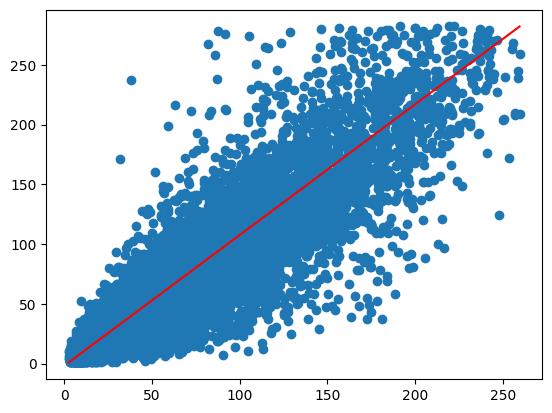

In [74]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max(), 100), np.linspace(y_test.min(), y_test.max(), 100), color='red')

In [76]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [100, 200],
    'min_samples_split': [2],
}

model = RandomForestRegressor(random_state=42)

grid = GridSearchCV(model, param, verbose=2, n_jobs=-1, cv=3)

grid_search = grid.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ..............min_samples_split=2, n_estimators=100; total time= 1.6min
[CV] END ..............min_samples_split=2, n_estimators=100; total time= 1.6min
[CV] END ..............min_samples_split=2, n_estimators=100; total time= 1.6min
[CV] END ..............min_samples_split=2, n_estimators=200; total time= 2.6min
[CV] END ..............min_samples_split=2, n_estimators=200; total time= 2.6min
[CV] END ..............min_samples_split=2, n_estimators=200; total time= 2.6min


In [77]:
grid_search.best_params_

{'min_samples_split': 2, 'n_estimators': 200}

In [78]:
grid_search.best_score_

np.float64(0.8082732833498634)

In [79]:
best_model = grid_search.best_estimator_

In [80]:
best_model.score(X_test, y_test)

0.826689764799183